In [27]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as sm
from sklearn.datasets import load_wine
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import median_absolute_error as mae
from sklearn.metrics import r2_score
from typing import Final

warnings.filterwarnings("ignore")

In [11]:
REMOVE_INDEX: Final[int] = 2
FEATURES: Final[list] = ['proline', 'color_intensity']

wine_dataset = load_wine()
df = pd.DataFrame(
    data=np.c_[wine_dataset['data'], wine_dataset['target']],
    columns=wine_dataset['feature_names'] + ['target']
)
df = df.loc[df['target'] != REMOVE_INDEX]

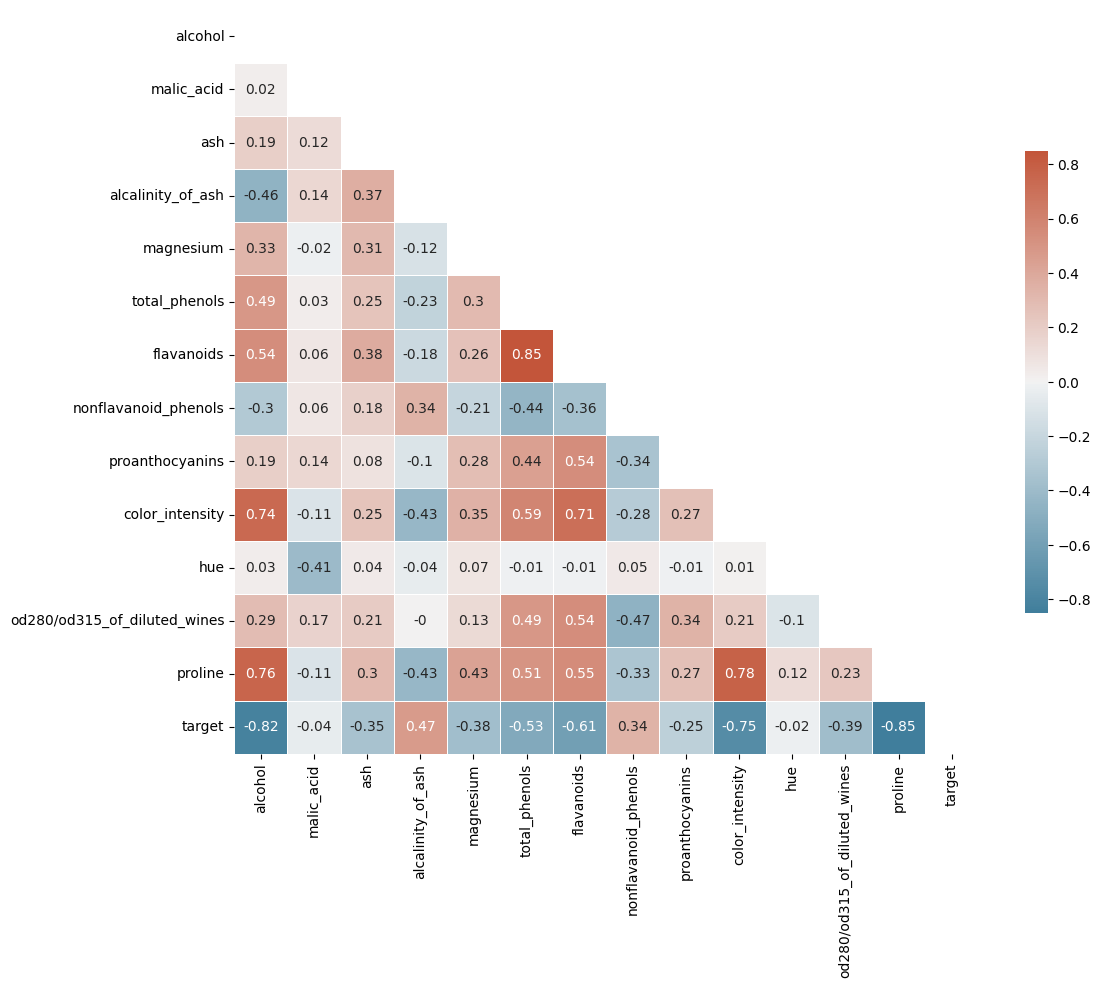

In [12]:
cmap = sns.diverging_palette(230, 20, as_cmap=True)
fig, ax, = plt.subplots(figsize=(12, 12))
mask = np.triu(np.ones_like(df.corr(), dtype=bool))
sns.heatmap(round(df.corr(), 2),
            mask=mask,
            cmap=cmap,
            square=True,
            linewidths=.5,
            center=0,
            cbar_kws={"shrink": .5},
            xticklabels=df.corr().columns,
            yticklabels=df.corr().columns,
            annot=True,
            ax=ax)
plt.show()

In [15]:
model = sm.logit(f"target ~ {'+'.join(FEATURES)}", df, subset=None, drop_cols=None)
result = model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.073314
         Iterations 11
                           Logit Regression Results                           
Dep. Variable:                 target   No. Observations:                  130
Model:                          Logit   Df Residuals:                      127
Method:                           MLE   Df Model:                            2
Date:                Sun, 05 Nov 2023   Pseudo R-squ.:                  0.8936
Time:                        14:32:45   Log-Likelihood:                -9.5309
converged:                       True   LL-Null:                       -89.554
Covariance Type:            nonrobust   LLR p-value:                 1.763e-35
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          31.3076     11.090      2.823      0.005       9.571      53.044
proline      

In [28]:
y_true = df.loc[:, 'target']
y_pred = predict = result.predict(df.loc[:, FEATURES])

rn = {
    'mae': mae(y_true, y_pred),
    'mse': mse(y_true, y_pred),
    'r2': r2_score(y_true, y_pred)
}
print(rn)

{'mae': 2.219029917660542e-05, 'mse': 0.024118741490851737, 'r2': 0.9026959343052293}
